# Vapor Deposition

<p> This generates a vapor deposition image. Here, the particles move like an ideal gas. They stick to the surface. </p>

In [ ]:
%%time
%%time

import numpy
import random
import os
from PIL import Image
from matplotlib import pyplot as plt

def tree_simulation(size, points, iterations):
    n=size
    data = numpy.zeros((n,n,3),dtype=numpy.uint8)
    danger_zone=numpy.zeros((n+1,n+1,1),dtype=numpy.uint8)

    live_points_count = points
    original_count = live_points_count
    particles = []

    #Create random set of live points, and make them visible
    i=0
    x=numpy.random.randint(0,n-1,size=live_points_count)
    y=numpy.random.randint(0,n-1,size=live_points_count)

    while i < live_points_count:
        data[x[i]][y[i]] = [255,255,255]
        coord = (x[i],y[i])
        #TODO create a far list and a near list.
        #The near list should only be particles that are within a certain x by x square and are updated every single step
        #The far list are updated every 20 steps.
        particles.append(coord)
        i+=1

    center = n//2

    

    for x in range(n):
        #set bottom line row to red and set them as a killer space
        data[n-1][x]=[255,0,0]
        danger_zone[n-1][x]=1

        #Look at points above the line to set to killer.
        danger_zone[n-2][x]=1
        data[n-2][x]=[0,255,0]

   

    image = Image.fromarray(data)
    image.show()

    for frame in range(iterations):
        live_points_count = len(particles)
        rand_motion = numpy.random.randint(0,4,live_points_count)
        movement = list(zip(particles,rand_motion))
        
        if frame % 100 == 0:
            print('iteration: ' + str(frame) + ' Particle Count: ' + str(live_points_count))

        for idx, pixel in enumerate(movement):
            #set current spot to black, pixel[0] is the particle and pixel[1] is the random motion for particle
            x=pixel[0][0]
            y=pixel[0][1]
            data[x][y] = [0,0,0]

            if(pixel[1]==0):
                #Particle moves upwards!
                y+=1

                if(y>=n):
                    y=0   
                data[x][y]=[255,255,255]
                particles[idx] = (x,y)

            elif(pixel[1]==1):
                #Particle moves downwards!
                y-=1
                if(y<=-1):
                    y=n-1
                data[x][y]=[255,255,255]
                particles[idx] = (x,y)


            elif(pixel[1]==2):
                #Particle moves left!
                x-=1
                if(x<=-1):
                    x=n-1
                data[x][y]=[255,255,255]
                particles[idx] = (x,y)

            elif(pixel[1]==3):
                #Particle moves right!
                x+=1
                if(x>=n):
                    x=0
                data[x][y]=[255,255,255]
                particles[idx] = (x,y)

            else:
                print('error!!!')

            #make the danger-zone check
            if(danger_zone[x][y]==1):
                #print('Danger Zoned!')
                if(live_points_count > 3*(original_count//4)): data[x][y] = [255,0,0]
                elif(live_points_count > 2*(original_count//4)): data[x][y] = [0,255,0]
                elif(live_points_count > original_count//4): data[x][y] = [0,0,255]
                else: data[x][y] = [255,0,255]
                
                
                particles.pop(idx) # WARNING probably O(N)
                movement.pop(idx)
                #TODO When fractal reaches end, danger zone attempts to grow larger. Prevent this.
                danger_zone[x-1][y]=1
                danger_zone[x+1][y]=1
                #data[x-1][y]=[0,255,0]
                #data[x+1][y]=[0,255,0]

                #Up and Down
                danger_zone[x][y-1]=1
                danger_zone[x][y+1]=1
                #data[x][y-1]=[0,255,0]
                #data[x][y+1]=[0,255,0]



            
    image = Image.fromarray(data)
    image.show()

    return data;


<p> Modify these parameters to see how the fractal grows. The simulation will generate the initial conditions and show it. Then it will run and print the final image below. </p>

iteration: 0 Particle Count: 10000
iteration: 100 Particle Count: 9768
iteration: 200 Particle Count: 9681
iteration: 300 Particle Count: 9592
iteration: 400 Particle Count: 9518
iteration: 500 Particle Count: 9471
iteration: 600 Particle Count: 9413
iteration: 700 Particle Count: 9364
iteration: 800 Particle Count: 9329
iteration: 900 Particle Count: 9295
iteration: 1000 Particle Count: 9260
iteration: 1100 Particle Count: 9218
iteration: 1200 Particle Count: 9183
iteration: 1300 Particle Count: 9147
iteration: 1400 Particle Count: 9115
iteration: 1500 Particle Count: 9089
iteration: 1600 Particle Count: 9057
iteration: 1700 Particle Count: 9019
iteration: 1800 Particle Count: 8989
iteration: 1900 Particle Count: 8968
iteration: 2000 Particle Count: 8942
iteration: 2100 Particle Count: 8916
iteration: 2200 Particle Count: 8883
iteration: 2300 Particle Count: 8866
iteration: 2400 Particle Count: 8836
iteration: 2500 Particle Count: 8808
iteration: 2600 Particle Count: 8782
iteration: 2

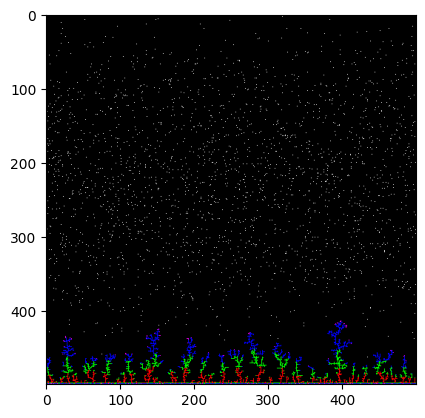

In [13]:
#Modify these
Grid_size = 500         #Creates a square grid of size Grid_size
particle_count = 10000   #Number of particles
iterations = 100000       #Amount of times that the simulation will run for.

plt.imshow(tree_simulation(Grid_size,particle_count,iterations))